#DATOS DE MERCADEO DE VALORES (Acciones de Bitcoins)

##Instalando librerías

In [198]:
!pip install fsspec
!pip install beautifulsoup4 

##Importando librebrías

In [199]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D   #para graficas en 3D

import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

#from wikitables import import_tables    # para descargar tablas de Wikipedia
from sklearn.decomposition import PCA   # Análisis de componentes principales (PCA).

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##Importando dataset

https://github.com/Moisesdv10/Deep-Learning/blob/main/Databases/BTC-USD.csv

In [200]:
df_bitcoins = pd.read_csv("https://raw.githubusercontent.com/Moisesdv10/Deep-Learning/main/Databases/BTC-USD.csv")
df_bitcoins.head(25)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500.0
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700.0
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400.0
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800.0


In [201]:
df_bitcoins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2566 non-null   object 
 1   Open       2562 non-null   float64
 2   High       2562 non-null   float64
 3   Low        2562 non-null   float64
 4   Close      2562 non-null   float64
 5   Adj Close  2562 non-null   float64
 6   Volume     2562 non-null   float64
dtypes: float64(6), object(1)
memory usage: 140.5+ KB


## Conociendo y Preprocesando los datos

In [202]:
#df_bitcoins.info()
#df_bitcoins.describe()
df_bitcoins.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

##Eliminando filas vacías

In [203]:
df_bitcoins = df_bitcoins.dropna()
df_bitcoins = df_bitcoins.reset_index(drop=True)

##cambiando el tipo de dato de Date a DATATIME

In [205]:
df_bitcoins['Date']=pd.to_datetime(df_bitcoins['Date'])       # Convertimos el campo DATE en tipo fecha
df_bitcoins = df_bitcoins.rename(columns={'Name':'symbol'})   #cambiamos el nombre la col de NAME a  SYMBOL
df_bitcoins.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [206]:
df_bitcoins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2562 non-null   datetime64[ns]
 1   Open       2562 non-null   float64       
 2   High       2562 non-null   float64       
 3   Low        2562 non-null   float64       
 4   Close      2562 non-null   float64       
 5   Adj Close  2562 non-null   float64       
 6   Volume     2562 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 140.2 KB


In [207]:
df_bitcoins.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##Definidiendo que columnas usaremos para el ejercicio

In [215]:
df_bitcoins = df_bitcoins[['Close','Volume']]
df_bitcoins.head()

,Close,Volume
Date,,
2014-09-21,398.821014,26580100.0
2014-09-28,377.181000,23613300.0
2014-10-05,320.510010,83308096.0
2014-10-12,378.549011,17552800.0
2014-10-19,389.545990,5914570.0


###Normalización de los datos usando como base la fecha

---
Puede decidir volver a muestrear los datos:

*  W - para datos semanales
*  M - para datos mensuales
*  Q - para el trimestre
*  A - por año

In [216]:
df_bitcoins = df_bitcoins.resample('W').last()
df_bitcoins.head()
#df['date'] = pd.to_datetime(df['date'])
#weekly_summary = df.story_point.resample('W', on='date').sum()

,Close,Volume
Date,,
2014-09-21,398.821014,26580100.0
2014-09-28,377.181000,23613300.0
2014-10-05,320.510010,83308096.0
2014-10-12,378.549011,17552800.0
2014-10-19,389.545990,5914570.0


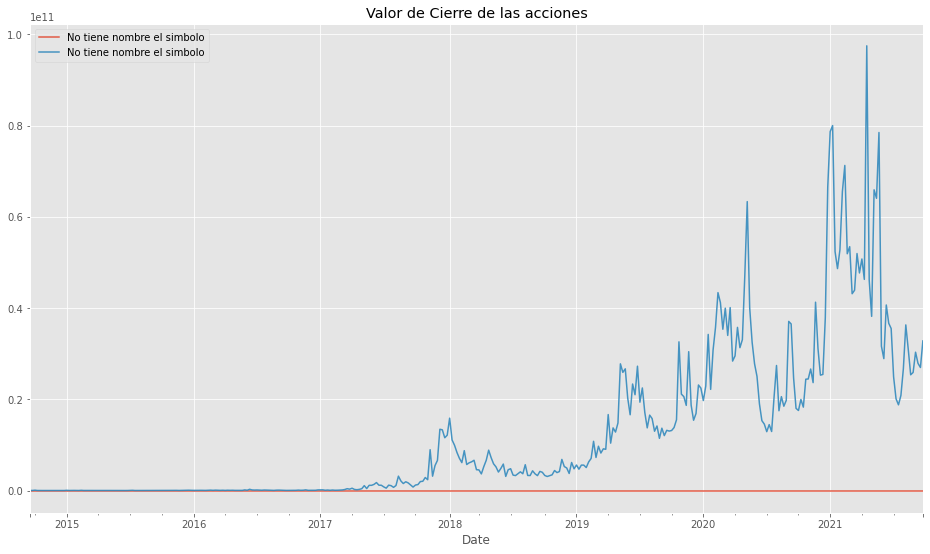

In [224]:
plot_stock('Close')
plot_stock('Volume')
plt.title('Valor de Cierre de las acciones')
plt.legend();

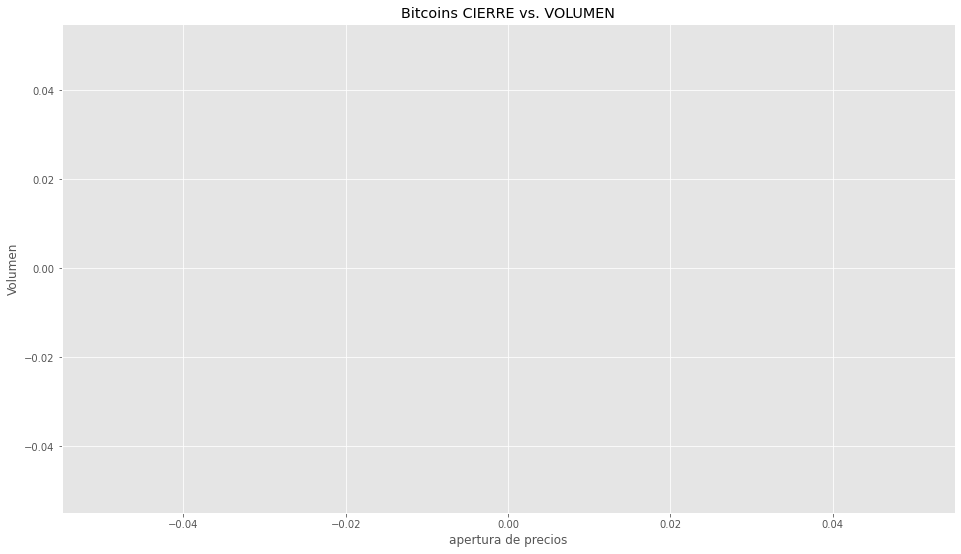

In [251]:
#%% Representación gráfica de los datos.
x = df_escalado['Close'].values
y = df_escalado['Volume'].values
plt.xlabel('apertura de precios')
plt.ylabel('Volumen')
plt.title('Bitcoins CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=1)

##Aplicación de k-means.

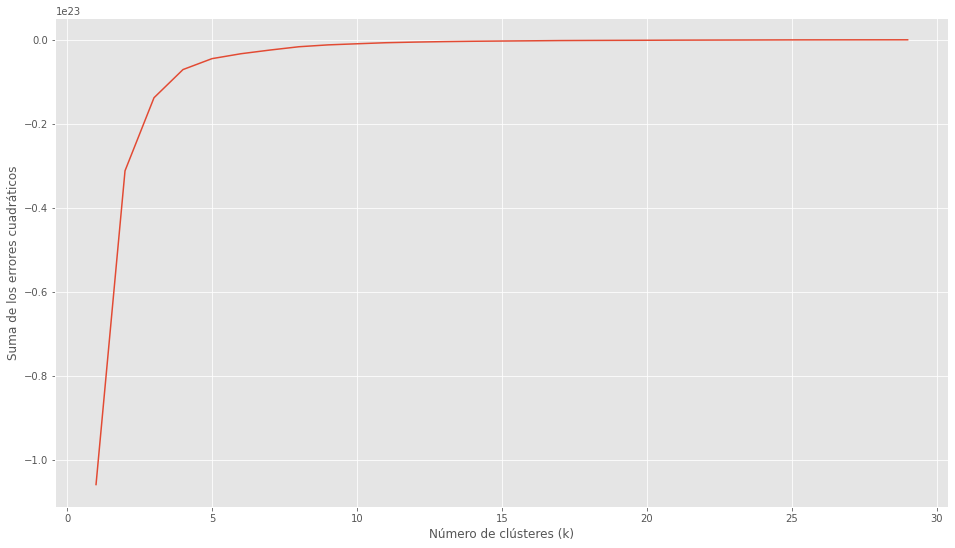

In [226]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_bitcoins).score(df_bitcoins) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

In [228]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_bitcoins)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[2.45840036e+03 1.50334841e+09]
 [3.57166110e+04 4.53956982e+10]
 [1.07041596e+04 1.51346189e+10]
 [1.91653678e+04 2.89650786e+10]
 [3.89463062e+04 7.31093183e+10]]


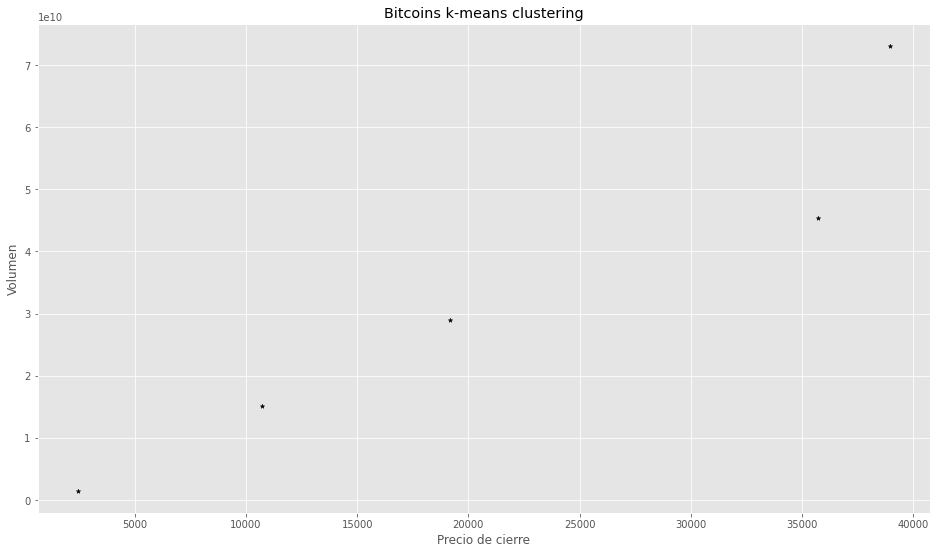

In [246]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('Bitcoins k-means clustering')
plt.show()

In [254]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_bitcoins.index.values
df_cluster['data_index']= df_bitcoins.Close
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


In [249]:
df_cluster[df_cluster.cluster == 2]

,data_index,cluster
164,NaN,2
168,NaN,2
169,NaN,2
170,NaN,2
171,NaN,2
...,...,...
316,NaN,2
317,NaN,2
355,NaN,2
356,NaN,2
